In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from itertools import combinations
from sklearn.decomposition import PCA


In [6]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: c:\Users\ntama\Documentos\Data Science\Codecademy\projects\Date-A-Scientist - Final Project\OKCupid-Date-A-Scientist-Starter\date-a-scientist-project\notebooks


In [12]:
profiles_scaled = pd.read_csv("../data/profiles_processed.csv", index_col=0)
profiles_scaled.head()

,age,body_type,drinks,drugs,education,height,sex,smokes,diet_anything,diet_halal,...,status_available,status_married,status_seeing someone,status_single,dogs_has dogs,dogs_likes dogs,dogs_no dogs,cats_has cats,cats_likes cats,cats_no cats
0,-1.093889,4,1,0,3,1.678374,1,1,True,False,...,False,False,False,True,False,True,False,False,True,False
1,0.281388,1,2,1,0,0.426738,1,0,False,False,...,False,False,False,True,False,True,False,False,True,False
2,0.598759,0,1,0,4,-0.073917,1,0,True,False,...,True,False,False,False,False,False,True,True,False,False
3,-0.988098,0,1,0,3,0.677065,1,0,False,False,...,False,False,False,True,False,False,True,False,True,False
4,-0.353355,2,1,0,3,-0.574571,1,0,True,False,...,False,False,False,True,False,True,False,False,True,False


### 01.- Applying PCA for dimensionality reduction

#### Implementation with NumPy

In [20]:
correlation_matrix = profiles_scaled.corr()
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

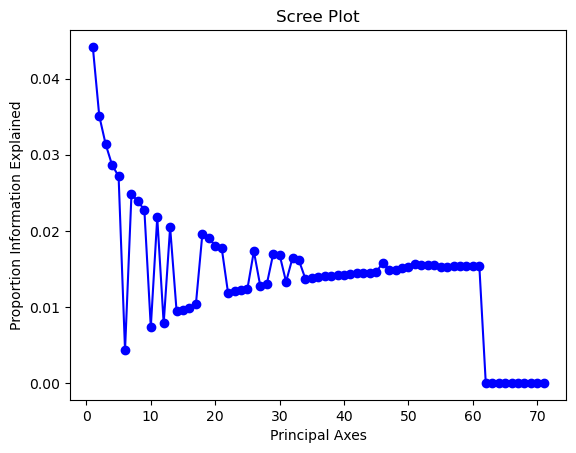

In [22]:
#Visualization of the scree plot to show the proportion of information described by each principal component
info_prop = eigenvalues/eigenvalues.sum()
plt.plot(np.arange(1, len(info_prop) + 1), info_prop, 'bo-')
plt.xlabel('Principal Axes')
plt.ylabel('Proportion Information Explained')
plt.title('Scree Plot')
plt.show()

How many principal axes it takes to reach around 95% of the total amount of information?

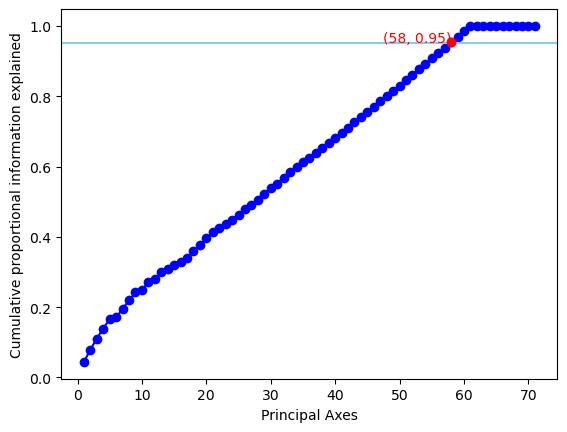

In [26]:
#cumulative sum of info_prop
cum_info_prop = np.cumsum(info_prop)
threshold = 0.95

idx = np.where(cum_info_prop >= threshold)[0][0]
x = np.arange(1, len(info_prop)+1)

x_intersect = x[idx]
y_intersect = cum_info_prop[idx]

#plot the values
plt.plot(x, cum_info_prop, 'bo-')
plt.axhline(threshold, color='skyblue')
plt.plot(x_intersect, y_intersect, 'ro')   # Intersection point
plt.text(x_intersect, y_intersect, f'({x_intersect}, {y_intersect:.2f})', fontsize=10, color='red', ha='right')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative proportional information explained')

plt.show()

In [28]:
# Sort eigenvectors by eigenvalue magnitude (descending)
k = 58

sorted_indices = np.argsort(eigenvalues)[::-1]
top_k_indices = sorted_indices[:k]
W_k = eigenvectors[:, top_k_indices]  # shape: (71, k)

In [29]:
#Projection of the data onto the top k principal components
X_pca = profiles_scaled @ W_k  # shape: (n_samples, k)


In [30]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-0.637008,1.256713,1.877989,-0.255161,0.284609,-0.238481,0.081362,0.571828,0.280075,-0.299861,...,1.669688,0.986555,2.25511,-0.325032,-0.313216,-0.909084,1.460929,1.605292,-0.89773,0.091358
1,-1.14162,0.986585,1.119368,0.645299,0.715222,0.234055,1.10774,-0.203957,0.195413,0.275178,...,0.55591,0.459829,0.258552,0.814487,0.186429,-1.108504,0.085094,0.137027,-0.18181,-0.083368
2,0.8818,-0.332605,0.397648,1.499306,-0.63649,0.39599,-1.105283,-0.603041,0.394822,-0.915639,...,0.096043,0.14634,0.081479,0.350566,0.025725,-0.646701,1.189459,2.345214,-1.579685,0.119518
3,0.445183,0.07553,0.932271,0.74822,1.27853,0.929661,-0.721899,-0.547262,0.6784,-0.337344,...,0.151436,-0.076743,0.089743,0.194724,0.069996,-0.803086,0.845335,1.269427,-1.510099,-0.020994
4,-0.092315,0.618629,1.038496,-0.431101,-0.167543,0.781696,-1.199827,-0.623393,-0.101645,-0.646086,...,0.857233,0.651278,1.186358,0.295946,-0.27672,-0.984032,1.04974,1.662858,-0.741744,0.105434
